In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

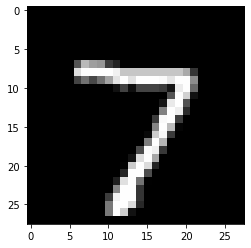

In [3]:
from matplotlib import pyplot as plt

plt.imshow(x_test[0].reshape(28,28),cmap='gray')

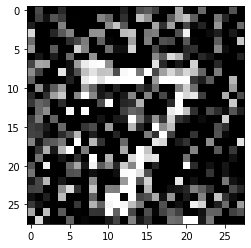

In [4]:
plt.imshow(x_test_noisy[0].reshape(28,28),cmap='gray')

In [5]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
history=autoencoder.fit(x_train_noisy, x_train,
epochs=100,
validation_split=0.1,
)




Train on 54000 samples, validate on 6000 samples
Epoch 1/100





54000/54000 [==============================] - 25s 470us/step - loss: 0.1281 - val_loss: 0.1080
Epoch 2/100
54000/54000 [==============================] - 10s 181us/step - loss: 0.1040 - val_loss: 0.1025
Epoch 3/100
54000/54000 [==============================] - 10s 182us/step - loss: 0.1003 - val_loss: 0.0999
Epoch 4/100
54000/54000 [==============================] - 10s 176us/step - loss: 0.0984 - val_loss: 0.0989
Epoch 5/100
54000/54000 [==============================] - 9s 176us/step - loss: 0.0972 - val_loss: 0.0982
Epoch 6/100
54000/54000 [==============================] - 9s 170us/step - loss: 0.0965 - val_loss: 0.0973
Epoch 7/100
54000/54000 [==============================] - 9s 173us/step - loss: 0.0960 - val_loss: 0.0972
Epoch 8/100
54000/54000 [==============================] - 10s 182us/step - loss: 0.0956 - val_loss: 0.0964
Epoch 9/100
54000/54000 [==============================] - 11s 197us/step - loss: 

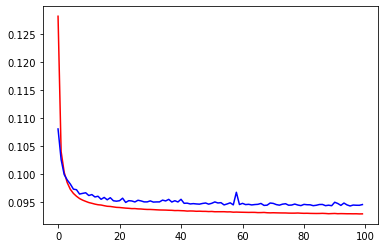

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],'b',label='loss')

In [0]:
autoencoder.save_weights('autoencorders_noise_removal.h5')